# **Project Title:** Employee Analytics & Retention Strategy  
  
Analyzed a real-world HR dataset to generate actionable insights supporting employee retention and salary optimization. Explored patterns across departments, satisfaction, demographics, and performance using Python. Delivered data-driven recommendations through visualizations and statistical analysis, simulating a real HR business request.

In [1]:
# Import pakages

# For data manipulation
import numpy as np
import pandas as pd


# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = r'C:\Users\theha\Downloads\HRDataset_v14.csv'
df = pd.read_csv(file_path)

# View general information
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [3]:
# Check for NULL data
print(df.isnull().sum())

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [4]:
# Convert date type
df['DateofHire'] = pd.to_datetime(df['DateofHire'], errors='coerce')
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'], errors='coerce')

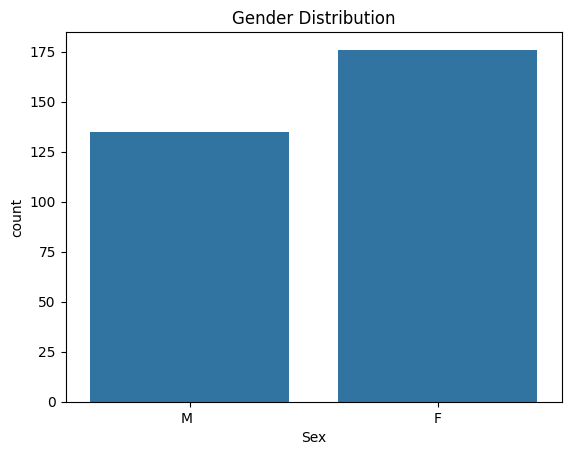

In [5]:
# Gender distribution
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

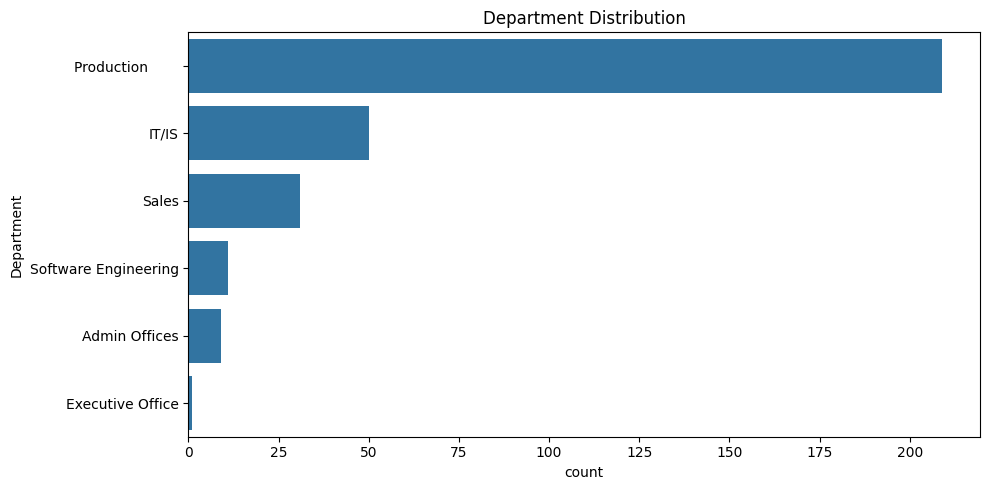

In [6]:
# Department distribution
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, order=df['Department'].value_counts().index)
plt.title('Department Distribution')
plt.tight_layout()
plt.show()

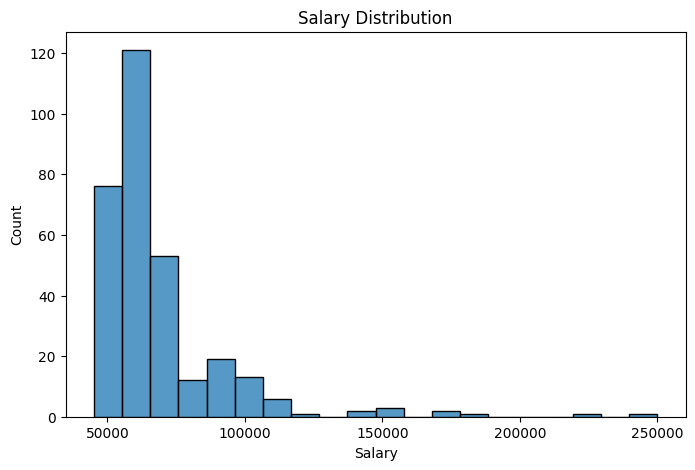

In [7]:
# Salary distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], bins=20)
plt.title('Salary Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

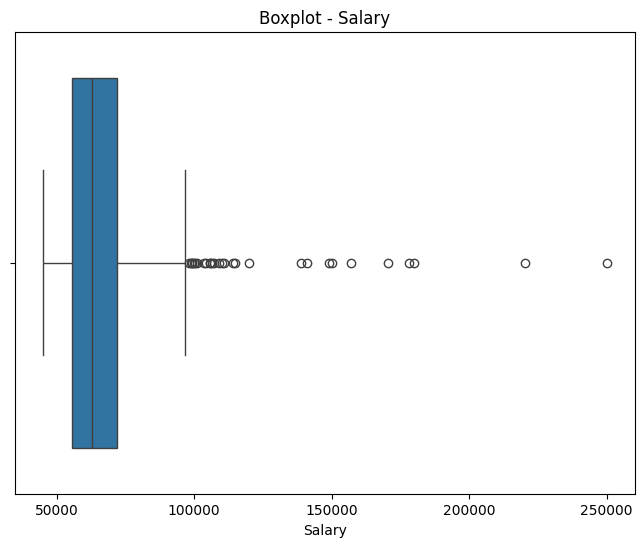

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot - Salary')
plt.xlabel('Salary')
plt.show

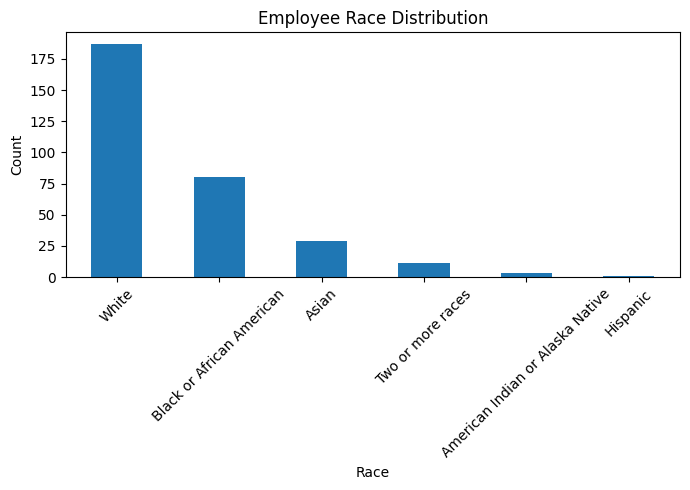

In [9]:
# Race distribution
plt.figure(figsize=(7,5))
df['RaceDesc'].value_counts().plot(kind='bar')
plt.title('Employee Race Distribution')
plt.ylabel('Count')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1. Dataset Overview**
-  
- The data contains information on employee demographics, job performance, salaries, satisfaction, and employment history.
- There are no missing values in the dataset, indicating good data quality for analysis.
- All data fields have been successfully coverted to datetime format ('DateofHire', 'LastPerformanceReview_Date').
- The dataset includes **diverse department** such as IT/IS, Software Engineering, Sales, Admin, and Executive Office.

**2. Initial Exploratory Insights**
-
- **Gender Distribution:** The company has a higher proportion of female employees than male employees.
- **Department Distribution:** The largest department by headcount are Production and IT/IS.
- **Salary Distribution:** Salaries range widely across employees. Most salaries are concentrated between \$50,000 - \$100,000, with a few outliers earning significantly more.
- **Salary Outliers:** The chart shows large salary differences, many employees have unusually high salaries (outliers), salary policies need to be reviewed to ensure fairness.
- **Race Distribution:** The largest race by headcount are White and Black or African American and the third is Asian.

**3. Data Analysis and Visualization**
-

In [10]:
# Calculate average salary by department
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print(avg_salary_by_dept)

Department
Executive Office        250000.000000
IT/IS                    97064.640000
Software Engineering     94989.454545
Admin Offices            71791.888889
Sales                    69061.258065
Production               59953.545455
Name: Salary, dtype: float64


### **3.1 Average Salary by Department**  

The department with the highest average salary is the **Executive Office**, with a mean salary of \$250,000. In contrast, the **Production** department has the lowest average salary at around \$59,953.

This disparity is expected: executive roles often require higher qualifications, leadership experience, and carry greater responsibility. Meanwhile, the Production department, despite having the largest headcount, typically involves more operational roles with lower pay scales.

This insight suggests that salary distribution aligns with organizational hierarchy, though it may raise questions about equity or growth opportunities in operational departments.

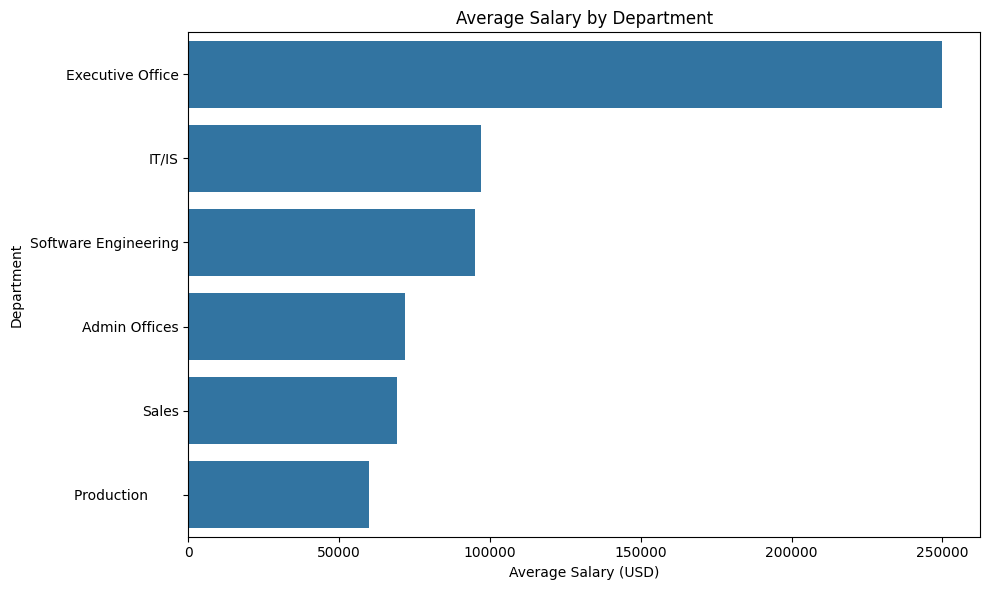

In [11]:
# Visualize Average Salary by Department
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_dept.values, y=avg_salary_by_dept.index)
plt.title('Average Salary by Department')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

**Visualization Insight:**

The bar chart clearly highlights the **Executive Office** as a significant outlier in terms of average salary. Its average is more than **2–3 times higher** than any other department. This reflects the typical structure of corporate salary distribution, where executive leadership positions receive substantially higher compensation.

Such disparity may be expected, but it also raises strategic HR questions:
- Are the roles in other departments compensated fairly?
- Are there clear pathways for employees in lower-paid departments (like Production) to move up?

In [12]:
# Calculate average salary by sex
avg_salary_by_gender = df.groupby('Sex')['Salary'].mean()
print(avg_salary_by_gender)

Sex
F     67786.727273
M     70629.400000
Name: Salary, dtype: float64


### **3.2 Average Salary by Gender**  

The analysis reveals that the **average salary for male employees is \$70,629**, while for **female employees it is \$67,786** — a relatively small difference of about 4%. This suggests that, on average, **the company demonstrates a fair level of pay equity between genders**.

However, an important detail to note is that **female employees outnumber male employees**. This raises a deeper analytical question:
> Do women disproportionately occupy lower-paying departments, or is their representation balanced across all roles?

To address this, we should explore:
- Gender distribution by department
- Outliers (e.g., very high or low salaries) that may affect the average
- Gender representation in higher-paying departments like Executive Office and IT/IS

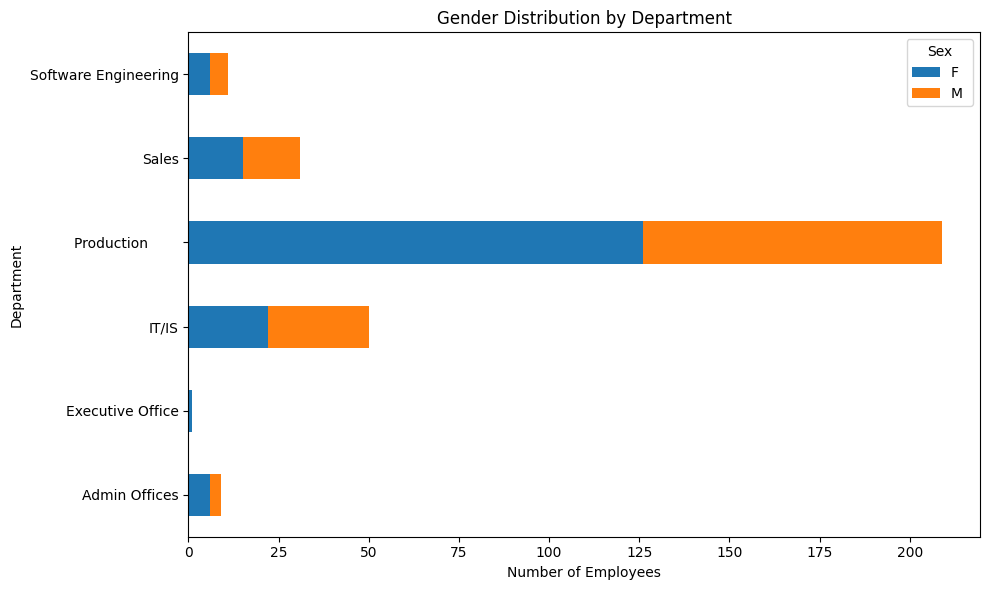

In [13]:
# Count the number of employees by gender in each department
gender_by_dept = df.groupby(['Department', 'Sex'])['Salary'].count().unstack()
gender_by_dept.plot(kind='barh', stacked=True, figsize=(10,6))
plt.title('Gender Distribution by Department')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

### **3.3 Gender Distribution by Department**  

The gender distribution across departments appears mostly balanced, **except for the Production department**, which shows a **significantly higher number of female employees**. Interestingly, **Production also has the lowest average salary** in the organization.  

Furthermore, the **Executive Office**, which offers the highest average salary (\$250,000), contains **only male employees**. This concentration of high-paying executive roles among men may partially explain why **the overall gender pay gap appears small**, despite potential disparities in role seniority and influence.  

This observation raises two important questions:
- Are female employees equally represented in leadership or high-paying positions?  
- Should the organization examine opportunities for improving gender diversity in senior roles?  

These insights could guide future HR policies toward more equitable talent development and promotion strategies.  

In [14]:
# Calculate Average salary by race
avg_salary_by_race = df.groupby('RaceDesc')['Salary'].mean().sort_values(ascending=False)
print(avg_salary_by_race)

RaceDesc
Hispanic                            83667.000000
Black or African American           74431.025000
Asian                               68521.206897
White                               67287.545455
American Indian or Alaska Native    65806.000000
Two or more races                   59998.181818
Name: Salary, dtype: float64


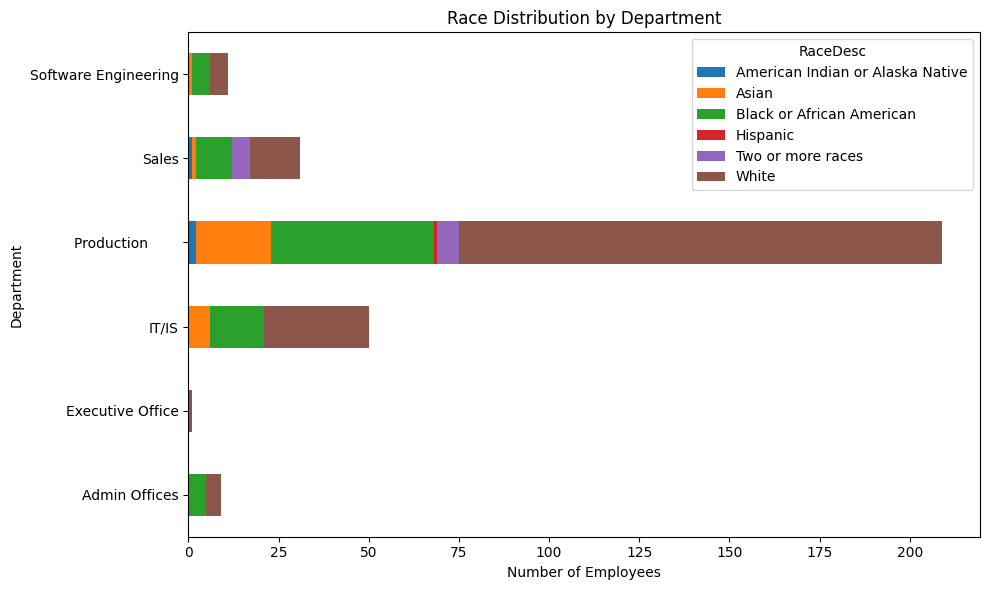

In [15]:
# Count the number of employees by Race in each department
gender_by_dept = df.groupby(['Department', 'RaceDesc'])['Salary'].count().unstack()
gender_by_dept.plot(kind='barh', stacked=True, figsize=(10,6))
plt.title('Race Distribution by Department')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

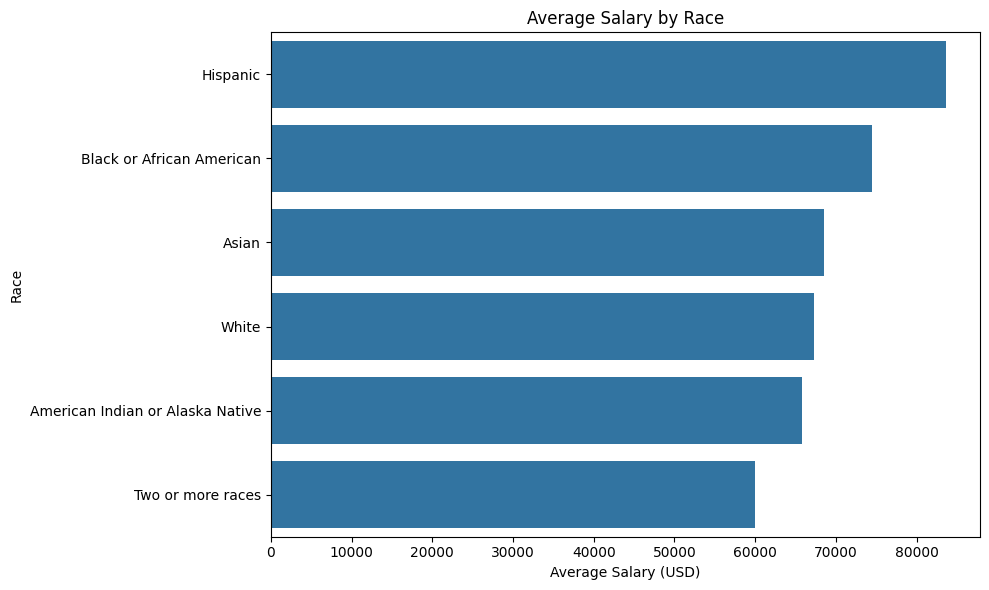

In [16]:
# Visualize Average Salary by Race
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_race.values, y=avg_salary_by_race.index)
plt.title('Average Salary by Race')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Race')
plt.tight_layout()
plt.show()

### **3.4 Race Distribution and Pay Equity**

From the race distribution charts, we can see that the company employs a **diverse workforce**, with White employees being the largest racial group. However, this group is also **concentrated in the Production department**, which has the lowest average salary.

Meanwhile, employees from other racial backgrounds (e.g., Hispanic, Asian, Black or African American) are spread across different departments, contributing to the **relatively balanced average salaries** observed across races.

This suggests that while **White employees dominate in terms of headcount**, their concentration in lower-paying roles keeps the salary gap between racial groups relatively small. These patterns reinforce the need to ensure **equal access to higher-paying opportunities** across all demographics.

In [17]:
# Calculate average salary based on performance rating
avg_salary_by_perf = df.groupby('PerformanceScore')['Salary'].mean().sort_values(ascending=False)
print(avg_salary_by_perf)

PerformanceScore
Exceeds              77144.864865
Needs Improvement    68407.555556
Fully Meets          68366.720165
PIP                  58971.076923
Name: Salary, dtype: float64


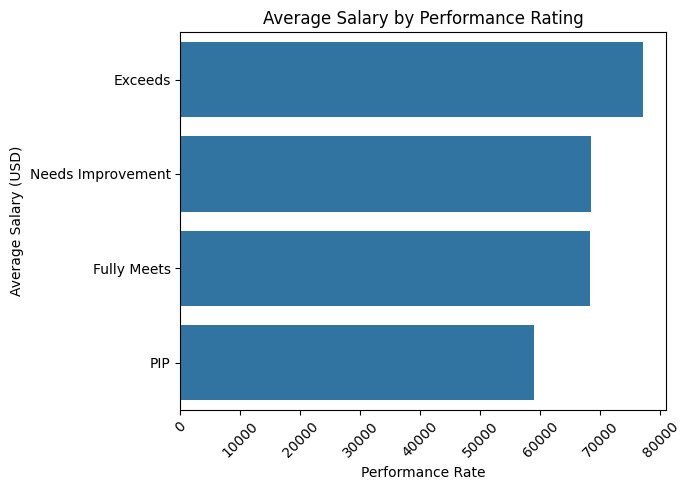

In [18]:
# Race distribution
plt.figure(figsize=(7,5))
sns.barplot(x=avg_salary_by_perf.values, y=avg_salary_by_perf.index)
plt.title('Average Salary by Performance Rating')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Performance Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **3.5 Salary by Performance Rating**

The data confirms that **employees with higher performance ratings are rewarded with higher salaries**. Specifically, those rated as "**Exceeds Expectations**" earn an average of \$77,145 — significantly more than the other groups.

This supports the assumption that the organization practices **merit-based compensation**, where high performers are appropriately recognized.

There are no major anomalies or inequities in this aspect, which reinforces the fairness of the performance-to-salary link. However, this also suggests that the **next layer of analysis** should focus on **retention risks** among top performers — especially if any are underpaid or at risk of leaving.

In [19]:
# Filter high performing employees
top_perf = df[df['PerformanceScore'] == 'Exceeds']

# Sort by low satisfaction, many days off, low pay
risk_candidates = top_perf[(top_perf['EmpSatisfaction']<=3) | (top_perf['Absences']>=10)]
risk_candidates = risk_candidates[['Employee_Name','Department','Salary','EmpSatisfaction','Absences','PerformanceScore']]
risk_candidates.sort_values(by=['EmpSatisfaction', 'Absences'], ascending=[True, False], inplace=True)

# View list of high performing employees but at risk of leaving
risk_candidates.head(10)

,Employee_Name,Department,Salary,EmpSatisfaction,Absences,PerformanceScore
22,"Billis, Helen",Production,62910,3,19,Exceeds
16,"Beak, Kimberly",Production,70131,3,16,Exceeds
36,"Candie, Calvin",Production,72640,3,14,Exceeds
208,"Osturnka, Adeel",Production,47414,3,13,Exceeds
201,"Ngodup, Shari",Production,52984,3,12,Exceeds
167,"Liebig, Ketsia",Production,77915,3,11,Exceeds
304,"Winthrop, Jordan",Production,70507,3,7,Exceeds
282,"Torrence, Jack",Sales,64397,3,6,Exceeds
257,"Smith, Joe",Production,60656,3,4,Exceeds
145,"Johnston, Yen",Production,63322,3,1,Exceeds


### **3.6 At-Risk High Performers in Production department**

Based on the filtered data, we identified multiple employees in the **Production department** with **"Exceeds Expectations" performance**, but also showing **low satisfaction scores (3/5)** and in some cases, **high absenteeism** (up to 19 days in 30 days).

Notably:
- Salaries range **widely**, from \$47,414 to \$77,915, despite similar performance levels.
- Most of these employees are from **Production**, indicating possible systemic dissatisfaction in this department.
- Some top performers like *Osturnka, Adeel* and *Ngodup, Shari* are earning relatively low salaries and may be retention risks.

This pattern suggests **inequity or lack of recognition in compensation or working conditions**. HR may need to:
- Review compensation fairness within Production
- Conduct interviews to understand root causes of absenteeism
- Offer targeted retention programs, such as:
  - **Salary adjustments** for underpaid top performers
  - **Non-monetary benefits** (flexible work hours, recognition, health packages)

These data-driven actions can help avoid the loss of highly productive employees.

## 4. Summary of Key Insights

> ⚠️ Note: The Executive Office contains only one employee, representing a unique outlier in both compensation and structure. Therefore, we exclude this department from comparative analysis related to salary fairness, gender distribution, or performance-based recommendations.

This project conducted an in-depth analysis of HR data to uncover insights related to salary equity, workforce performance, and employee retention risks. The findings are summarized below:

### 4.1. Salary Distribution by Department
- The **IT/IS** has the highest average salary (\$250,000), far exceeding other departments but at the same time not too different from the second department which is **Software Engineering**.
- The **Production department**, with the largest employee headcount, has the **lowest average salary** (~\$59,953).
- This suggests salary is heavily tied to job level and function.

### 4.2. Gender Pay Equity
- Average salary for **male employees** is \$70,629 while for **female employees** it's \$67,786 — a **minor 4% gap**.
- However, **female employees are absent in executive roles** and are overrepresented in low-paying departments like Production.
- There is a risk of **glass ceiling effects** impacting internal career mobility.

### 4.3. Racial Salary Distribution
- Salaries across racial groups are **relatively balanced**, with **Hispanic employees** earning the highest average (\$83,667).
- The largest racial group (White) is **heavily concentrated in Production**, contributing to a lower group average.
- Overall, the company demonstrates **racial pay equity**, but leadership diversity should be monitored.

### 4.4. Salary vs. Performance
- Employees rated **"Exceeds Expectations"** earn the highest average salary (~\$77,145), validating **merit-based compensation**.
- No major anomalies observed in the salary-to-performance relationship.

### 4.5. Retention Risks
- Several **high-performing employees** in the Production department show **low satisfaction and high absenteeism**.
- Their salaries vary significantly despite similar performance, posing **internal equity risks**.
- These employees are likely to leave unless **corrective actions** (pay adjustments, benefits, recognition) are taken.

---
**Conclusion:**  
The organization generally demonstrates fair compensation practices, especially by race and performance. However, structural issues exist in the Production department, and there's a **clear opportunity to improve gender and role-based equity**, particularly in leadership tracks.

These insights will inform the upcoming **2025 workforce strategy**, enabling targeted retention and talent development efforts.


## 5. Strategic Recommendations

Based on the insights derived from the HR data, we propose the following recommendations to support the organization's 2025 workforce strategy:

---

### 5.1. Address Talent Risk in the Production Department

**Insight:**  
Several high-performing employees in the Production department show signs of disengagement — including high absenteeism and moderate satisfaction scores. Despite similar roles and performance levels, these employees receive significantly different salaries, highlighting a potential issue in internal pay equity.

**Recommendations:**
- **Review salary structure and equity:** Reassess pay across similar roles to correct unjustified salary disparities.
- **Apply targeted retention incentives:** Offer retention bonuses, performance-linked allowances, or clear growth tracks for top performers.
- **Enhance engagement:** Conduct regular feedback check-ins, involve team members in operational decisions, and publicly recognize contributions to build a culture of belonging.

---

### 5.2. Promote Gender Balance in High-Paying Roles

**Insight:**  
While the overall gender pay gap is small, women are overrepresented in low-paying departments (e.g., Production) and underrepresented in higher-paying functions like IT/IS and Software Engineering.

**Recommendations:**
- **Conduct a gender-role audit:** Evaluate whether gender correlates with role type and pay level.
- **Support advancement programs:** Implement mentoring, cross-training, and leadership readiness initiatives for underrepresented genders.
- **Ensure transparent promotions:** Standardize promotion criteria in technical and strategic roles to encourage balanced growth.

---

### 5.3. Sustain Performance-Based Pay while Improving Retention

**Insight:**  
The company maintains a well-functioning merit-based compensation model, where employees with higher performance receive higher salaries. However, some high performers still show signs of turnover risk, indicating salary alone may not retain talent.

**Recommendations:**
- **Maintain salary-performance linkage:** Continue regular reviews and result-driven pay adjustments.
- **Introduce non-financial incentives:**
  - Public recognition (e.g., “Top Performer” shoutouts)
  - Exclusive development opportunities
  - Flexible work arrangements or sabbaticals
- **Design personalized career paths:** Offer internal mobility, impactful projects, and strategic growth plans.
- **Conduct stay interviews:** Understand deeper motivations and frustrations among high-value contributors.

---

### 5.4. Strengthen Fairness and Transparency in Compensation

**Insight:**  
Excluding the Executive Office outlier, salary averages across gender and race are relatively balanced. However, internal disparities exist within departments — especially Production — affecting perceived fairness.

**Recommendations:**
- **Conduct internal pay band audits** across departments to identify gaps within roles and performance levels.
- **Implement standardized compensation tiers** to ensure consistency, especially in high-headcount areas.
- **Improve communication on pay philosophy** to build trust in compensation practices.
